<a href="https://colab.research.google.com/github/Yuliana1453/Proyek-Sistem-Rekomendasi/blob/main/Proyek_Sistem_Rekomendasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modul

In [44]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Loading Data

In [45]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip

--2025-06-10 07:04:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘RCdata.zip.1’

RCdata.zip.1            [ <=>                ]  38.74K  --.-KB/s    in 0.1s    

2025-06-10 07:04:57 (301 KB/s) - ‘RCdata.zip.1’ saved [39674]



In [46]:
!unzip /content/RCdata.zip

Archive:  /content/RCdata.zip
replace chefmozaccepts.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chefmozaccepts.csv      
replace chefmozcuisine.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chefmozcuisine.csv      
replace chefmozhours4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chefmozhours4.csv       
replace chefmozparking.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chefmozparking.csv      
replace geoplaces2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: geoplaces2.csv          
replace rating_final.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: rating_final.csv        
replace README? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: README                  
replace usercuisine.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: usercuisine.csv         
replace userpayment.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: userpayment.csv         
replace userprofile.csv? [y]es, [n]o, [A]

In [47]:
accepts = pd.read_csv('/content/chefmozaccepts.csv')
cuisine = pd.read_csv('/content/chefmozcuisine.csv')
hours = pd.read_csv('/content/chefmozhours4.csv')
parking = pd.read_csv('/content/chefmozparking.csv')
geo = pd.read_csv('/content/geoplaces2.csv', encoding = "ISO-8859-1")
usercuisine = pd.read_csv('/content/usercuisine.csv')
payment = pd.read_csv('/content/userpayment.csv')
profile = pd.read_csv('/content/userprofile.csv')
rating = pd.read_csv('/content/rating_final.csv')

print('Jumlah data pembayaran yang diterima restoran: ', len(accepts.placeID.unique()))
print('Jumlah data masakan pada restoran: ', len(cuisine.placeID.unique()))
print('Jumlah data waktu buka restoran: ', len(hours.placeID.unique()))
print('Jumlah data lokasi restoran: ', len(geo.placeID.unique()))
print('Jumlah data masakan pengguna: ', len(usercuisine.userID.unique()))
print('Jumlah data profil pengguna: ', len(profile.userID.unique()))
print('Jumlah data penilaian yang diberikan pengguna: ', len(rating.userID.unique()))
print('Jumlah data penilaian restoran: ', len(rating.placeID.unique()))

Jumlah data pembayaran yang diterima restoran:  615
Jumlah data masakan pada restoran:  769
Jumlah data waktu buka restoran:  694
Jumlah data lokasi restoran:  130
Jumlah data masakan pengguna:  138
Jumlah data profil pengguna:  138
Jumlah data penilaian yang diberikan pengguna:  138
Jumlah data penilaian restoran:  130


# Univariate EDA

## accept.csv

In [48]:
accepts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   1314 non-null   int64 
 1   Rpayment  1314 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.7+ KB


In [49]:
print('Banyak data: ', len(accepts.placeID.unique()))
print('Jenis Pembayaran yang diterima: ', accepts.Rpayment.unique())

Banyak data:  615
Jenis Pembayaran yang diterima:  ['cash' 'VISA' 'MasterCard-Eurocard' 'American_Express' 'bank_debit_cards'
 'checks' 'Discover' 'Carte_Blanche' 'Diners_Club' 'Visa'
 'Japan_Credit_Bureau' 'gift_certificates']


##cuisine.csv

In [50]:
cuisine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   916 non-null    int64 
 1   Rcuisine  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


In [51]:
print('Banyak tipe masakan: ', len(cuisine.Rcuisine.unique()))
print('Tipe masakan: ', cuisine.Rcuisine.unique())

Banyak tipe masakan:  59
Tipe masakan:  ['Spanish' 'Italian' 'Latin_American' 'Mexican' 'Fast_Food' 'Burgers'
 'Dessert-Ice_Cream' 'Hot_Dogs' 'Steaks' 'Asian' 'International'
 'Mongolian' 'Vegetarian' 'Brazilian' 'Cafe-Coffee_Shop' 'Cafeteria'
 'Contemporary' 'Deli-Sandwiches' 'Diner' 'Japanese' 'Sushi' 'Seafood'
 'Chinese' 'Bar' 'Bar_Pub_Brewery' 'Pizzeria' 'Mediterranean' 'American'
 'Family' 'Caribbean' 'African' 'Breakfast-Brunch' 'Regional' 'Afghan'
 'Bakery' 'Game' 'Armenian' 'Vietnamese' 'Korean' 'Thai' 'Barbecue'
 'Polish' 'Dutch-Belgian' 'French' 'German' 'Southwestern' 'Persian'
 'Ethiopian' 'Juice' 'Soup' 'Continental-European' 'Greek' 'Southern'
 'Eastern_European' 'California' 'Bagels' 'Turkish' 'Organic-Healthy'
 'Fine_Dining']


##profile.csv

In [52]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userID            138 non-null    object 
 1   latitude          138 non-null    float64
 2   longitude         138 non-null    float64
 3   smoker            138 non-null    object 
 4   drink_level       138 non-null    object 
 5   dress_preference  138 non-null    object 
 6   ambience          138 non-null    object 
 7   transport         138 non-null    object 
 8   marital_status    138 non-null    object 
 9   hijos             138 non-null    object 
 10  birth_year        138 non-null    int64  
 11  interest          138 non-null    object 
 12  personality       138 non-null    object 
 13  religion          138 non-null    object 
 14  activity          138 non-null    object 
 15  color             138 non-null    object 
 16  weight            138 non-null    int64  
 1

In [53]:
profile.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


Pada latihan dengan content-based filtering nanti, data yang dibutuhkan adalah nama restoran dan cuisine. Kita akan menghitung kesamaan (similarity) cuisine dan nama restoran kemudian membuat rekomendasi berdasarkan kesamaan ini. Data-data ini dibutuhkan saat kita membuat sistem rekomendasi dengan teknik lain, misalnya, teknik yang melibatkan demografi.

##rating.csv

In [54]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userID          1161 non-null   object
 1   placeID         1161 non-null   int64 
 2   rating          1161 non-null   int64 
 3   food_rating     1161 non-null   int64 
 4   service_rating  1161 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 45.5+ KB


In [55]:
rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [56]:
rating.describe()

,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


In [57]:
print('Jumlah userID: ', len(rating.userID.unique()))
print('Jumlah placeID: ', len(rating.placeID.unique()))
print('Jumlah data rating: ', len(rating))

Jumlah userID:  138
Jumlah placeID:  130
Jumlah data rating:  1161


#Data Preprocessing

##Menggabungkan Restoran

In [58]:
# Menggabungkan seluruh placeID pada kategori Restaurant
resto_all = np.concatenate((
    accepts.placeID.unique(),
    cuisine.placeID.unique(),
    hours.placeID.unique(),
    parking.placeID.unique(),
    geo.placeID.unique()
))

# Mengurutkan data dan menghapus data yang sama
resto_all = np.sort(np.unique(resto_all))

print('Jumlah seluruh data restoran berdasarkan placeID: ', len(resto_all))

Jumlah seluruh data restoran berdasarkan placeID:  938


##Menggabungkan Seluruh User

In [59]:
# Menggabungkan seluruh userID
user_all = np.concatenate((
    usercuisine.userID.unique(),
    payment.userID.unique(),
    profile.userID.unique()
))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  138


##Mengetahui Jumlah Rating

In [60]:
# Menggabungkan file accepts, geo, parking, hours ke dalam dataframe resto_info
resto_info = pd.concat([accepts, geo, parking, hours])

# Menggabungkan dataframe rating dengan resto_info berdasarkan nilai placeID
resto = pd.merge(rating, resto_info , on='placeID', how='left')
resto.head()

,userID,placeID,rating,food_rating,service_rating,Rpayment,latitude,longitude,the_geom_meter,name,...,accessibility,price,url,Rambience,franchise,area,other_services,parking_lot,hours,days
0,U1077,135085,2,2,2,cash,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U1077,135085,2,2,2,NaN,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,...,no_accessibility,medium,?,familiar,f,closed,none,NaN,NaN,NaN
2,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,public,NaN,NaN
3,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-00:00;,Mon;Tue;Wed;Thu;Fri;
4,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-00:00;,Sat;


In [61]:
# Cek missing value dengan fungsi isnull()
resto.isnull().sum()

,0
userID,0
placeID,0
rating,0
food_rating,0
service_rating,0
Rpayment,5781
latitude,6917
longitude,6917
the_geom_meter,6917
name,6917


##Menggabungkan Data dengan Fitur Nama Resto

In [62]:
# Definisikan dataframe rating ke dalam variabel all_resto_rate
all_resto_rate = rating
all_resto_rate

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [63]:
# Menggabungkan all resto_rate dengan dataframe geo berdasarkan placeID
all_resto_name = pd.merge(all_resto_rate, geo[['placeID','name']], on='placeID', how='left')

# Print dataframe all_resto_name
all_resto_name.head()

,userID,placeID,rating,food_rating,service_rating,name
0,U1077,135085,2,2,2,Tortas Locas Hipocampo
1,U1077,135038,2,2,1,Restaurant la Chalita
2,U1077,132825,2,2,2,puesto de tacos
3,U1077,135060,1,2,2,Restaurante Marisco Sam
4,U1068,135104,1,1,2,vips


##Menggabungkan Data dengan Fitur masakan Resto

In [64]:
# Menggabungkan dataframe cuisine dengan all_resto_name dan memasukkannya ke dalam variabel all_resto
all_resto = pd.merge(all_resto_name, cuisine, on='placeID', how='left')
all_resto.head()

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
0,U1077,135085,2,2,2,Tortas Locas Hipocampo,Fast_Food
1,U1077,135038,2,2,1,Restaurant la Chalita,NaN
2,U1077,132825,2,2,2,puesto de tacos,Mexican
3,U1077,135060,1,2,2,Restaurante Marisco Sam,Seafood
4,U1068,135104,1,1,2,vips,Mexican


# Data Preparation

##Mengatasi Missing Value

In [65]:
# Mengecek missing value pada dataframe all_resto
all_resto.isnull().sum()

,0
userID,0
placeID,0
rating,0
food_rating,0
service_rating,0
name,0
Rcuisine,288


Terdapat 288 missing value pada fitur `Rcuisine` (kategori masakan). 288 dari 1331 merupakan jumlah yang signifikan. Sebenarnya sayang jika data missing value ini langsung di-drop begitu saja. Namun, kita tidak bisa mengidentifikasi nama masakan yang tidak memiliki data `Rcuisine` ini termasuk ke dalam kategori masakan mana. Oleh karena itu, untuk saat ini kita akan drop saja missing value ini.

In [66]:
# Membersihkan missing value dengan fungsi dropna()
all_resto_clean = all_resto.dropna()
all_resto_clean.head()

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
0,U1077,135085,2,2,2,Tortas Locas Hipocampo,Fast_Food
2,U1077,132825,2,2,2,puesto de tacos,Mexican
3,U1077,135060,1,2,2,Restaurante Marisco Sam,Seafood
4,U1068,135104,1,1,2,vips,Mexican
5,U1068,132740,0,0,0,Carreton de Flautas y Migadas,Mexican


In [67]:
# Mengecek kembali missing value pada variabel all_resto_clean
all_resto_clean.isnull().sum()

,0
userID,0
placeID,0
rating,0
food_rating,0
service_rating,0
name,0
Rcuisine,0


##Menyamakan Jenis masakan

In [68]:
# Mengurutkan resto berdasarkan PlaceID kemudian memasukkannya ke dalam variabel fix_resto
fix_resto = all_resto_clean.sort_values('placeID', ascending=True)
fix_resto

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1288,U1050,132560,0,2,0,puesto de gorditas,Regional
42,U1082,132560,0,0,0,puesto de gorditas,Regional
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
14,U1067,132560,1,0,0,puesto de gorditas,Regional
854,U1092,132572,1,0,0,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...
189,U1055,135106,2,2,2,El Rincón de San Francisco,Mexican
1071,U1041,135109,1,2,1,Paniroles,Italian
99,U1030,135109,0,0,0,Paniroles,Italian
178,U1020,135109,2,2,1,Paniroles,Italian


In [69]:
# Mengecek berapa jumlah fix_resto
len(fix_resto.placeID.unique())

95

In [70]:
# Mengecek kategori masakan yang unik
fix_resto.Rcuisine.unique()

array(['Regional', 'Cafeteria', 'American', 'Mexican', 'Fast_Food',
       'Italian', 'Armenian', 'Pizzeria', 'Japanese', 'Vietnamese',
       'Family', 'International', 'Game', 'Burgers', 'Bakery', 'Bar',
       'Breakfast-Brunch', 'Bar_Pub_Brewery', 'Mediterranean',
       'Cafe-Coffee_Shop', 'Contemporary', 'Seafood', 'Chinese'],
      dtype=object)

Perhatikanlah, di antara semua kategori masakan pada data, ada satu yang menarik, yaitu kategori masakan bernama ‘Game’. Restoran mana yang memiliki kategori ‘Game’?

In [71]:
# Mengecek kategori masakan Game
fix_resto[fix_resto['Rcuisine'] == 'Game']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,Game
708,U1008,132851,1,1,1,KFC,Game
509,U1052,132851,1,0,2,KFC,Game
1188,U1131,132851,2,2,2,KFC,Game
770,U1037,132851,2,2,1,KFC,Game
764,U1111,132851,2,1,0,KFC,Game
574,U1069,132851,1,0,0,KFC,Game


In [72]:
# Mengecek kategori masakan pada nama restoran KFC
fix_resto[fix_resto['name'] == 'KFC']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
573,U1069,132851,1,0,0,KFC,American
781,U1015,132851,1,1,1,KFC,Game
708,U1008,132851,1,1,1,KFC,Game
780,U1015,132851,1,1,1,KFC,American
763,U1111,132851,2,1,0,KFC,American
508,U1052,132851,1,0,2,KFC,American
509,U1052,132851,1,0,2,KFC,Game
1188,U1131,132851,2,2,2,KFC,Game
1187,U1131,132851,2,2,2,KFC,American
769,U1037,132851,2,2,1,KFC,American


Dalam sistem rekomendasi yang akan kita kembangkan, satu restoran memiliki satu kategori masakan. Dalam hal ini, KFC lebih cocok disebut sebagai restoran dengan kategori masakan American. Jadi, kita perlu mengganti kategori ‘Game’ dengan ‘American’.

In [73]:
# Mengubah nama kategori masakan ‘Game’ menjadi ‘American’
fix_resto = fix_resto.replace('Game', 'American')
fix_resto[fix_resto['name'] == 'KFC']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
573,U1069,132851,1,0,0,KFC,American
781,U1015,132851,1,1,1,KFC,American
708,U1008,132851,1,1,1,KFC,American
780,U1015,132851,1,1,1,KFC,American
763,U1111,132851,2,1,0,KFC,American
508,U1052,132851,1,0,2,KFC,American
509,U1052,132851,1,0,2,KFC,American
1188,U1131,132851,2,2,2,KFC,American
1187,U1131,132851,2,2,2,KFC,American
769,U1037,132851,2,2,1,KFC,American


##Membuat variabel 'preparation'

In [74]:
# Membuat variabel preparation yang berisi dataframe fix_resto kemudian mengurutkan berdasarkan placeID
preparation = fix_resto
preparation.sort_values('placeID')

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1288,U1050,132560,0,2,0,puesto de gorditas,Regional
42,U1082,132560,0,0,0,puesto de gorditas,Regional
14,U1067,132560,1,0,0,puesto de gorditas,Regional
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1055,U1061,132572,1,2,2,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...
189,U1055,135106,2,2,2,El Rincón de San Francisco,Mexican
1071,U1041,135109,1,2,1,Paniroles,Italian
99,U1030,135109,0,0,0,Paniroles,Italian
178,U1020,135109,2,2,1,Paniroles,Italian


In [75]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('placeID')
preparation

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1288,U1050,132560,0,2,0,puesto de gorditas,Regional
854,U1092,132572,1,0,0,Cafe Chaires,Cafeteria
27,U1044,132583,1,2,1,McDonalds Centro,American
148,U1063,132584,2,1,1,Gorditas Dona Tota,Mexican
1304,U1087,132594,1,2,1,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...,...,...,...,...
1016,U1019,135086,0,0,0,Mcdonalds Parque Tangamanga,Burgers
179,U1051,135088,1,1,1,Cafeteria cenidet,Cafeteria
4,U1068,135104,1,1,2,vips,Mexican
807,U1135,135106,0,0,0,El Rincón de San Francisco,Mexican


##Konversi data series menjadi list

In [76]:
# Mengonversi data series ‘placeID’ menjadi dalam bentuk list
resto_id = preparation['placeID'].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
resto_name = preparation['name'].tolist()

# Mengonversi data series ‘Rcuisine’ menjadi dalam bentuk list
resto_cuisine = preparation['Rcuisine'].tolist()

print(len(resto_id))
print(len(resto_name))
print(len(resto_cuisine))

95
95
95


##Membuat dictionary untuk menentukan pasangan key-value

In [77]:
# Membuat dictionary untuk data ‘resto_id’, ‘resto_name’, dan ‘cuisine’
resto_new = pd.DataFrame({
    'id': resto_id,
    'resto_name': resto_name,
    'cuisine': resto_cuisine
})
resto_new

,id,resto_name,cuisine
0,132560,puesto de gorditas,Regional
1,132572,Cafe Chaires,Cafeteria
2,132583,McDonalds Centro,American
3,132584,Gorditas Dona Tota,Mexican
4,132594,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...
90,135086,Mcdonalds Parque Tangamanga,Burgers
91,135088,Cafeteria cenidet,Cafeteria
92,135104,vips,Mexican
93,135106,El Rincón de San Francisco,Mexican


#Model Development dengan Content Based Filtering

In [78]:
#Cek data dan assign/salin dataframe sebelumnya ke dalam variabel data
data = resto_new
data.sample(5)

,id,resto_name,cuisine
49,132955,emilianos,Bar_Pub_Brewery
73,135049,Restaurante de Mariscos la Langosta,Seafood
89,135085,Tortas Locas Hipocampo,Fast_Food
45,132925,el pueblito,Mexican
18,132732,Taqueria EL amigo,Mexican


##TF-IDF Vectorizer

In [79]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['cuisine'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['american', 'armenian', 'bakery', 'bar', 'bar_pub_brewery',
       'breakfast', 'brunch', 'burgers', 'cafeteria', 'chinese',
       'contemporary', 'family', 'fast_food', 'international', 'italian',
       'japanese', 'mexican', 'pizzeria', 'regional', 'seafood',
       'vietnamese'], dtype=object)

In [80]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['cuisine'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(95, 21)

In [80]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

In [83]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.resto_name).sample(21, axis=1).sample(10, axis=0)

,international,mexican,burgers,seafood,american,bar_pub_brewery,fast_food,breakfast,brunch,chinese,...,pizzeria,bakery,armenian,family,contemporary,vietnamese,japanese,bar,regional,italian
resto_name,,,,,,,,,,,,,,,,,,,,,
tortas hawai,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
la perica hamburguesa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Koye Sushi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pizza clasica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Restaurant and Bar and Clothesline Carlos N Charlies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
McDonalds Centro,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cafeteria y Restaurant El Pacifico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
la parroquia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.707107,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Restaurante Bar El Gallinero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##Cosine Similarity

In [84]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [85]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['resto_name'], columns=data['resto_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (95, 95)


resto_name,Sushi Itto,Cafeteria y Restaurant El Pacifico,Restaurant and Bar and Clothesline Carlos N Charlies,El Rincón de San Francisco,Gorditas Dona Tota
resto_name,,,,,
Restaurante la Parroquia Potosina,0.0,1.0,0.0,0.0,0.0
Michiko Restaurant Japones,1.0,0.0,0.0,0.0,0.0
Gorditas Dona Tota,0.0,0.0,0.0,1.0,1.0
Subway,0.0,0.0,0.0,0.0,0.0
el lechon potosino,0.0,0.0,0.0,0.0,0.0
TACOS EL GUERO,0.0,0.0,0.0,1.0,1.0
Restaurant Familiar El Chino,0.0,0.0,0.0,0.0,0.0
Paniroles,0.0,0.0,0.0,0.0,0.0
Hamburguesas saul,0.0,0.0,0.0,0.0,0.0


#Mendapatkan Rekomendasi

In [86]:
def resto_recommendations(nama_resto, similarity_data=cosine_sim_df, items=data[['resto_name', 'cuisine']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_resto : tipe data string (str)
                Nama Restoran (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_resto].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_resto, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Terapkan kode di atas untuk menemukan rekomendasi restoran yang mirip dengan KFC

In [87]:
data[data.resto_name.eq('KFC')]

,id,resto_name,cuisine
31,132851,KFC,American


In [88]:
# Mendapatkan rekomendasi restoran yang mirip dengan KFC
resto_recommendations('KFC')

,resto_name,cuisine
0,VIPS,American
1,tacos los volcanes,American
2,Pizzeria Julios,American
3,Sirlone,International
4,McDonalds Centro,American


Sistem memberikan rekomendasi 5 nama restoran dengan kategori ‘cuisine’ American dan satu kategori International.

#Model Development dengan Collaborative Filtering

## Import Library

In [89]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [90]:
# Membaca dataset
df = rating
df

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


##Data Preparation

In [91]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userID'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  ['U1077', 'U1068', 'U1067', 'U1103', 'U1107', 'U1044', 'U1070', 'U1031', 'U1082', 'U1023', 'U1060', 'U1015', 'U1123', 'U1021', 'U1026', 'U1083', 'U1108', 'U1012', 'U1093', 'U1030', 'U1066', 'U1127', 'U1017', 'U1100', 'U1133', 'U1118', 'U1072', 'U1080', 'U1063', 'U1074', 'U1117', 'U1020', 'U1051', 'U1055', 'U1053', 'U1035', 'U1064', 'U1081', 'U1001', 'U1014', 'U1088', 'U1056', 'U1134', 'U1106', 'U1126', 'U1124', 'U1018', 'U1125', 'U1119', 'U1076', 'U1022', 'U1094', 'U1116', 'U1105', 'U1075', 'U1007', 'U1115', 'U1024', 'U1132', 'U1005', 'U1120', 'U1004', 'U1037', 'U1052', 'U1036', 'U1038', 'U1071', 'U1114', 'U1084', 'U1049', 'U1019', 'U1069', 'U1113', 'U1104', 'U1079', 'U1045', 'U1009', 'U1016', 'U1047', 'U1095', 'U1034', 'U1078', 'U1099', 'U1008', 'U1040', 'U1121', 'U1110', 'U1042', 'U1013', 'U1054', 'U1111', 'U1128', 'U1062', 'U1101', 'U1135', 'U1032', 'U1048', 'U1092', 'U1085', 'U1109', 'U1102', 'U1098', 'U1046', 'U1122', 'U1138', 'U1033', 'U1089', 'U1003', 'U1091', 'U10

In [92]:
# Mengubah placeID menjadi list tanpa nilai yang sama
resto_ids = df['placeID'].unique().tolist()

# Melakukan proses encoding placeID
resto_to_resto_encoded = {x: i for i, x in enumerate(resto_ids)}

# Melakukan proses encoding angka ke placeID
resto_encoded_to_resto = {i: x for i, x in enumerate(resto_ids)}

In [93]:
# Mapping userID ke dataframe user
df['user'] = df['userID'].map(user_to_user_encoded)

# Mapping placeID ke dataframe resto
df['resto'] = df['placeID'].map(resto_to_resto_encoded)

In [94]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah resto
num_resto = len(resto_encoded_to_resto)
print(num_resto)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_resto, min_rating, max_rating
))

138
130
Number of User: 138, Number of Resto: 130, Min Rating: 0.0, Max Rating: 2.0


##Membagi Data untuk Training dan Validasi

In [95]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userID,placeID,rating,food_rating,service_rating,user,resto
538,U1052,132870,1.0,1,1,63,116
673,U1015,132869,2.0,2,2,11,115
578,U1047,132875,0.0,0,0,78,117
242,U1056,135076,2.0,2,2,41,71
1063,U1002,135106,1.0,1,1,125,64
...,...,...,...,...,...,...,...
1044,U1073,135065,0.0,0,0,123,94
1095,U1058,135062,2.0,2,2,124,76
1130,U1087,132660,1.0,1,0,132,14
860,U1029,132937,1.0,1,1,110,126


In [96]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'resto']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 63 116]
 [ 11 115]
 [ 78 117]
 ...
 [132  14]
 [110 126]
 [129   6]] [0.5 1.  0.  ... 0.5 0.5 0. ]


#Proses Training

In [97]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_resto + user_bias + resto_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Proses compile terhadap model.

In [98]:
model = RecommenderNet(num_users, num_resto, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [99]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.7097 - root_mean_squared_error: 0.4125 - val_loss: 0.7010 - val_root_mean_squared_error: 0.4059
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6909 - root_mean_squared_error: 0.3927 - val_loss: 0.6962 - val_root_mean_squared_error: 0.4030
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6653 - root_mean_squared_error: 0.3876 - val_loss: 0.6930 - val_root_mean_squared_error: 0.4010
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6603 - root_mean_squared_error: 0.3800 - val_loss: 0.6887 - val_root_mean_squared_error: 0.3983
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6404 - root_mean_squared_error: 0.3614 - val_loss: 0.6850 - val_root_mean_squared_error: 0.3960
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6515 - root_mean_squared_error: 0.3690 - val_loss: 0.6797 - val_root_mean_squared_error: 0.3927
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3

##Visualisasi Metrik

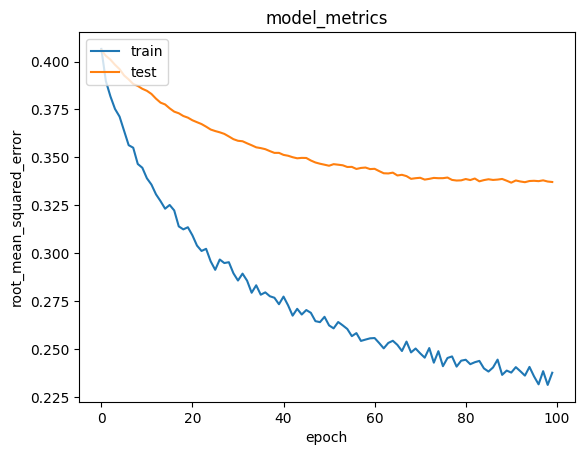

In [100]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Perhatikanlah, proses training model cukup smooth dan model konvergen pada epochs sekitar 100. Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.23 dan error pada data validasi sebesar 0.34. Nilai tersebut cukup bagus untuk sistem rekomendasi.

##Mendapatkan Rekomendasi Resto

In [101]:
resto_df = resto_new
df = pd.read_csv('rating_final.csv')

# Mengambil sample user
user_id = df.userID.sample(1).iloc[0]
resto_visited_by_user = df[df.userID == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
resto_not_visited = resto_df[~resto_df['id'].isin(resto_visited_by_user.placeID.values)]['id']
resto_not_visited = list(
    set(resto_not_visited)
    .intersection(set(resto_to_resto_encoded.keys()))
)

resto_not_visited = [[resto_to_resto_encoded.get(x)] for x in resto_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(resto_not_visited), resto_not_visited)
)

In [102]:
ratings = model.predict(user_resto_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_resto_ids = [
    resto_encoded_to_resto.get(resto_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Resto with high ratings from user')
print('----' * 8)

top_resto_user = (
    resto_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .placeID.values
)

resto_df_rows = resto_df[resto_df['id'].isin(top_resto_user)]
for row in resto_df_rows.itertuples():
    print(row.resto_name, ':', row.cuisine)

print('----' * 8)
print('Top 10 resto recommendation')
print('----' * 8)

recommended_resto = resto_df[resto_df['id'].isin(recommended_resto_ids)]
for row in recommended_resto.itertuples():
    print(row.resto_name, ':', row.cuisine)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Showing recommendations for users: U1114
Resto with high ratings from user
--------------------------------
La Estrella de Dimas : Mexican
puesto de tacos : Mexican
Pizzeria Julios : American
La Fontana Pizza Restaurante and Cafe : Fast_Food
--------------------------------
Top 10 resto recommendation
--------------------------------
La Posada del Virrey : International
cafe punta del cielo : Cafeteria
rockabilly  : Bar
emilianos : Bar_Pub_Brewery
Restaurant Las Mananitas : International
Kiku Cuernavaca : Japanese
El Oceano Dorado : Mexican
El Rincon de San Francisco : Mexican
Preambulo Wifi Zone Cafe : Cafeteria
Michiko Restaurant Japones : Japanese


**📌 Identitas Pengguna**

User ID: U1114

**✅ Preferensi Rasa atau Pola Rating User**

Resto yang disukai user (dengan rating tinggi):
- La Estrella de Dimas : Mexican
- puesto de tacos : Mexican
- Pizzeria Julios : American
- La Fontana Pizza Restaurante and Cafe : Fast Food

**📍Insight:**

User ini menyukai makanan Meksiko (Mexican) dan makanan cepat saji atau Amerika.

**🔮 Rekomendasi 10 Restoran Teratas**
- La Posada del Virrey : International
- cafe punta del cielo : Cafeteria
- rockabilly : Bar
- emilianos : Bar_Pub_Brewery
- Restaurant Las Mananitas : International
- Kiku Cuernavaca : Japanese
- El Oceano Dorado : Mexican
- El Rincon de San Francisco : Mexican
- Preambulo Wifi Zone Cafe : Cafeteria
- Michiko Restaurant Japones : Japanese


**Sistem rekomendasi mengusulkan:**

- Jenis baru: Japanese, Cafeteria, Bar, dan International
- Jenis favorit sebelumnya tetap direkomendasikan: Mexican

*Artinya, sistem tidak hanya mengulang preferensi lama, tapi juga memberikan eksplorasi pilihan yang serupa atau populer.*

**🧠 Kesimpulan Akhir**

Sistem rekomendasi berhasil mengidentifikasi preferensi utama pengguna, yaitu Mexican food, dan mengombinasikannya dengan jenis-jenis restoran lain yang serupa atau berpotensi disukai.

Rekomendasi ini bernilai bagi user yang ingin mencoba hal baru tapi tetap relevan dengan selera mereka.